In [1]:
import numpy as np
import bms_env
import matplotlib.pyplot as plt
from utils import *


In [2]:
bms = bms_env.BMSenv(num_cells= 2, k_tanh_params= [0.8, 2.5], Q_cells = [2.35, 2.35])
print(bms)

BMSenv(num_cells=2,
        k_tanh_params=[0.8 2.5],
        Q_cells=[2.35 2.35],
        MAX_VOLTAGE=4.2,
        MIN_VOLTAGE=2.2,
        INIT_SOC=0.9,
        I_CURRENT=0.22,
        TIMESTEP=0.001,
        w_reward=1.0,
        current_state=[4.2 4.2],
        current_soc=[0.86866742 0.89996368])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


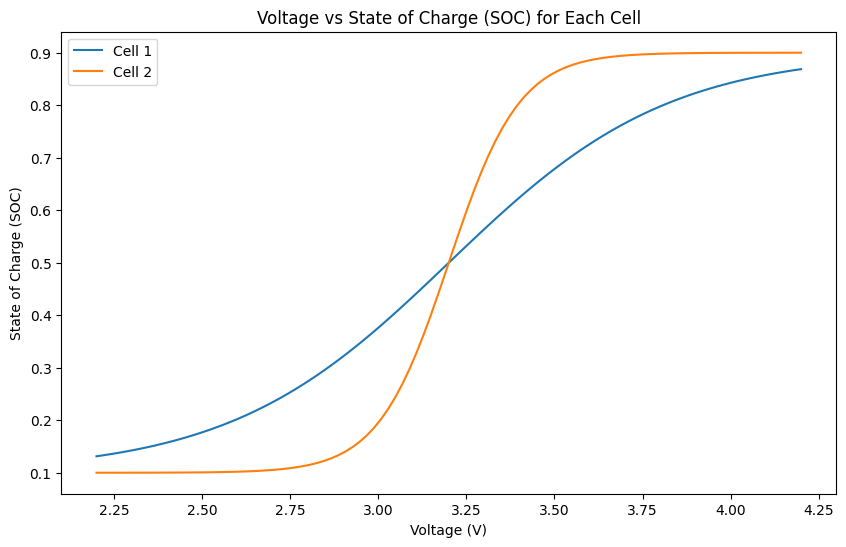

In [3]:
plot_voltage_vs_soc(bms)

In [4]:
T = 10_000

# Always disconected (All the batteries stay still)

In [5]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 0
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

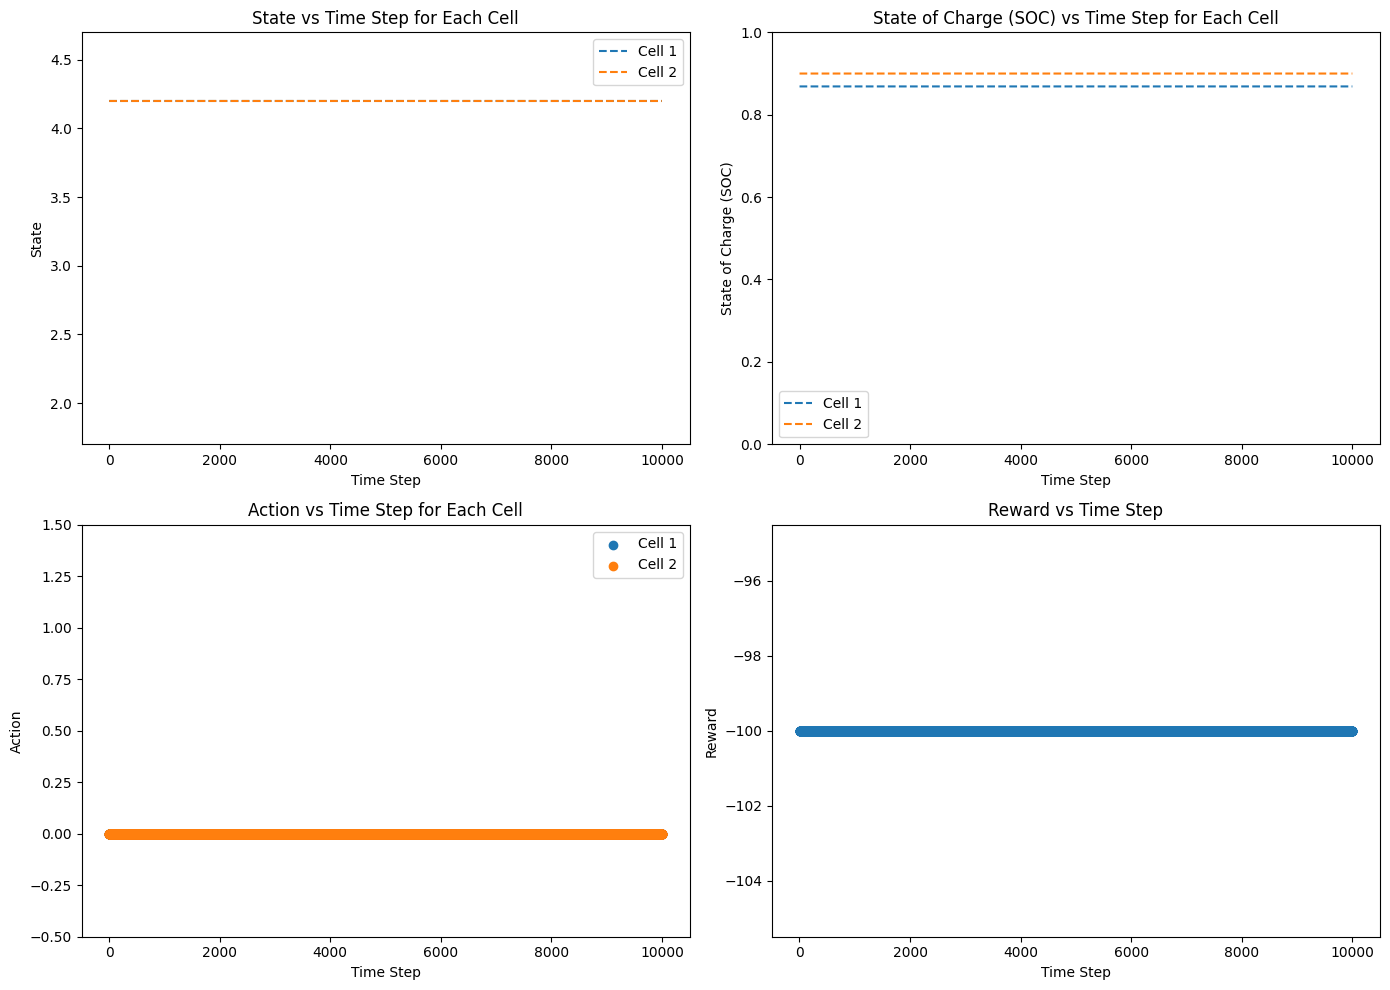

In [6]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Always connected (All the batteries Discharge)

In [7]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 3
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

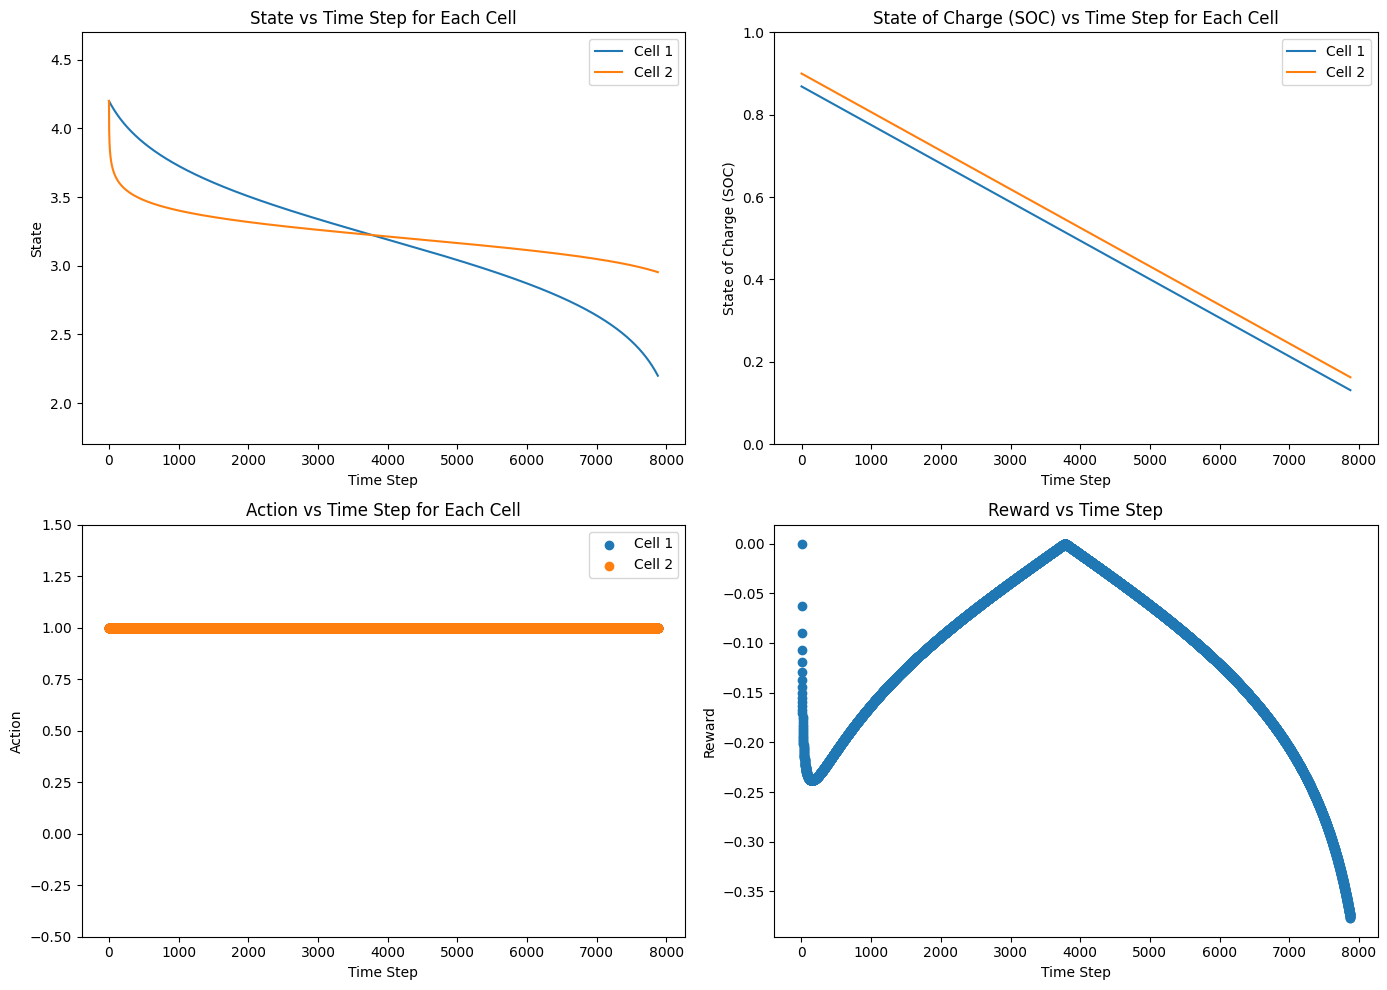

In [8]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 2 always discharging and Cell 1 always disconnected (still)

In [9]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 1
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

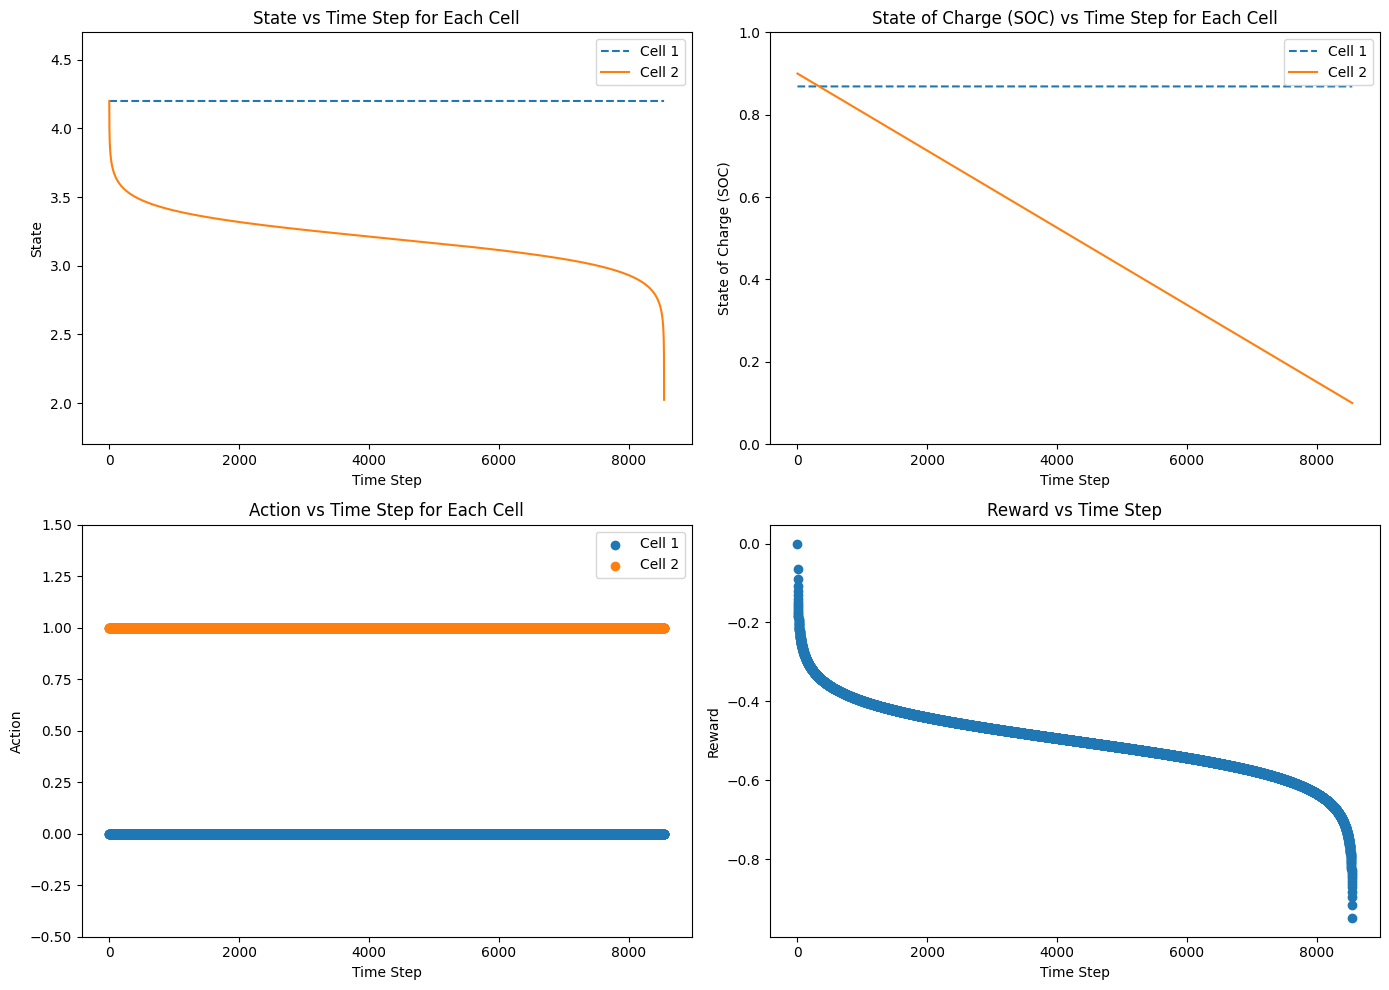

In [10]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Cell 1 always discharging and Cell 2 always disconnected (still)

In [11]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = 2
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

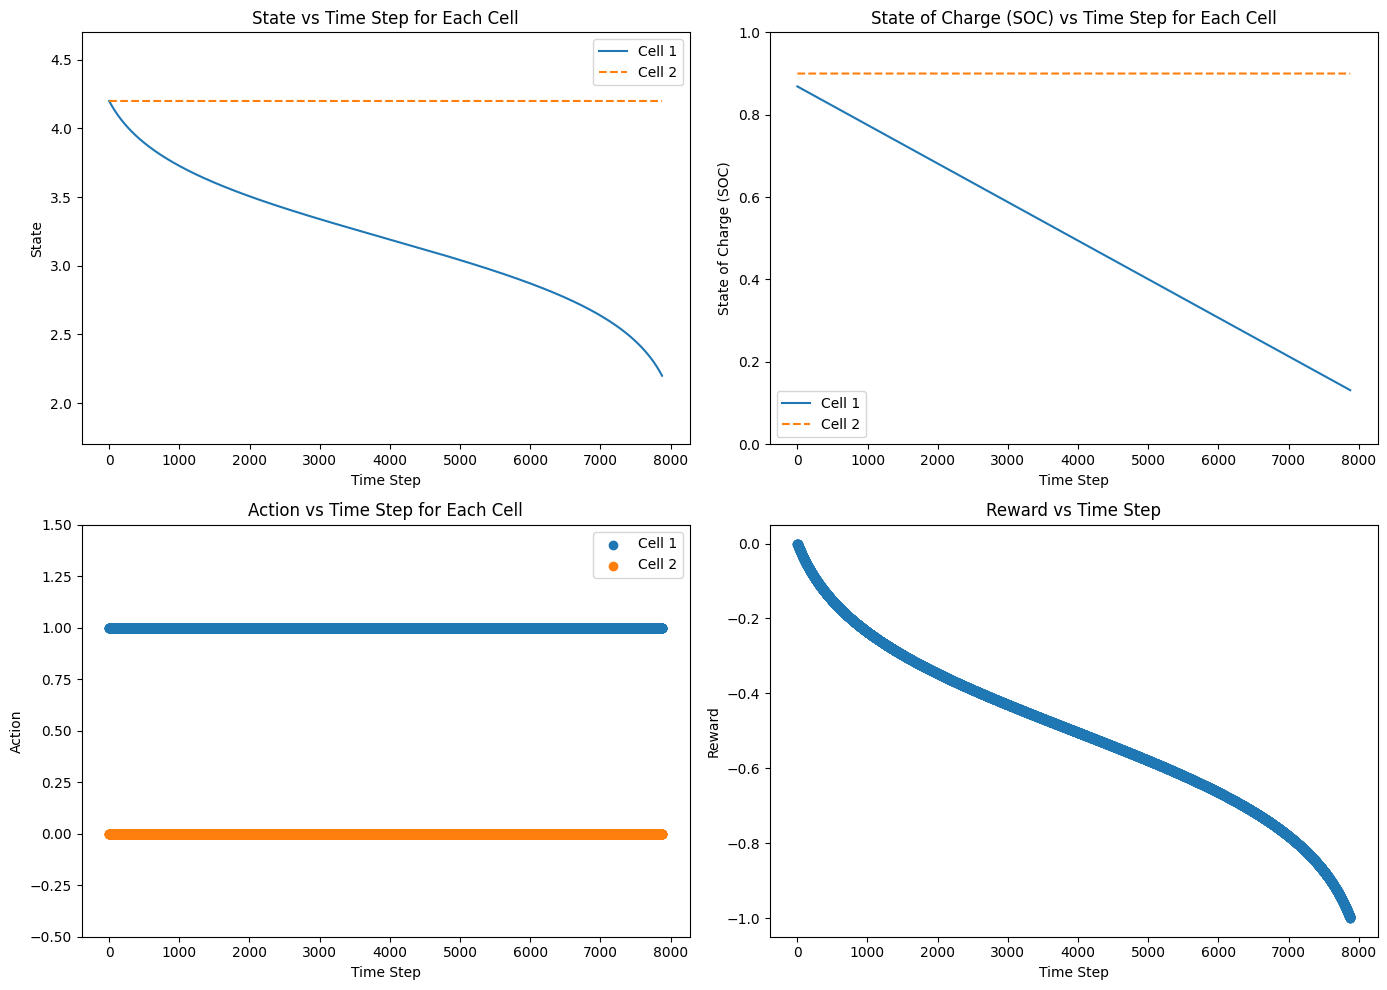

In [12]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)

# Random Controller

In [21]:
bms.reset()
states= [bms.state]
states_soc = [bms.state_soc]
actions = []
rewards = []
dones = [False]

while not dones[-1] and len(states) < T:
    action = bms.action_space.sample()
    while action ==0:
        action = bms.action_space.sample()
    state, reward, done, _ = bms.step(action)
    states.append(state)
    states_soc.append(bms.state_soc)
    actions.append(bms.int_action_to_switch_action(action))
    rewards.append(reward)
    dones.append(done)

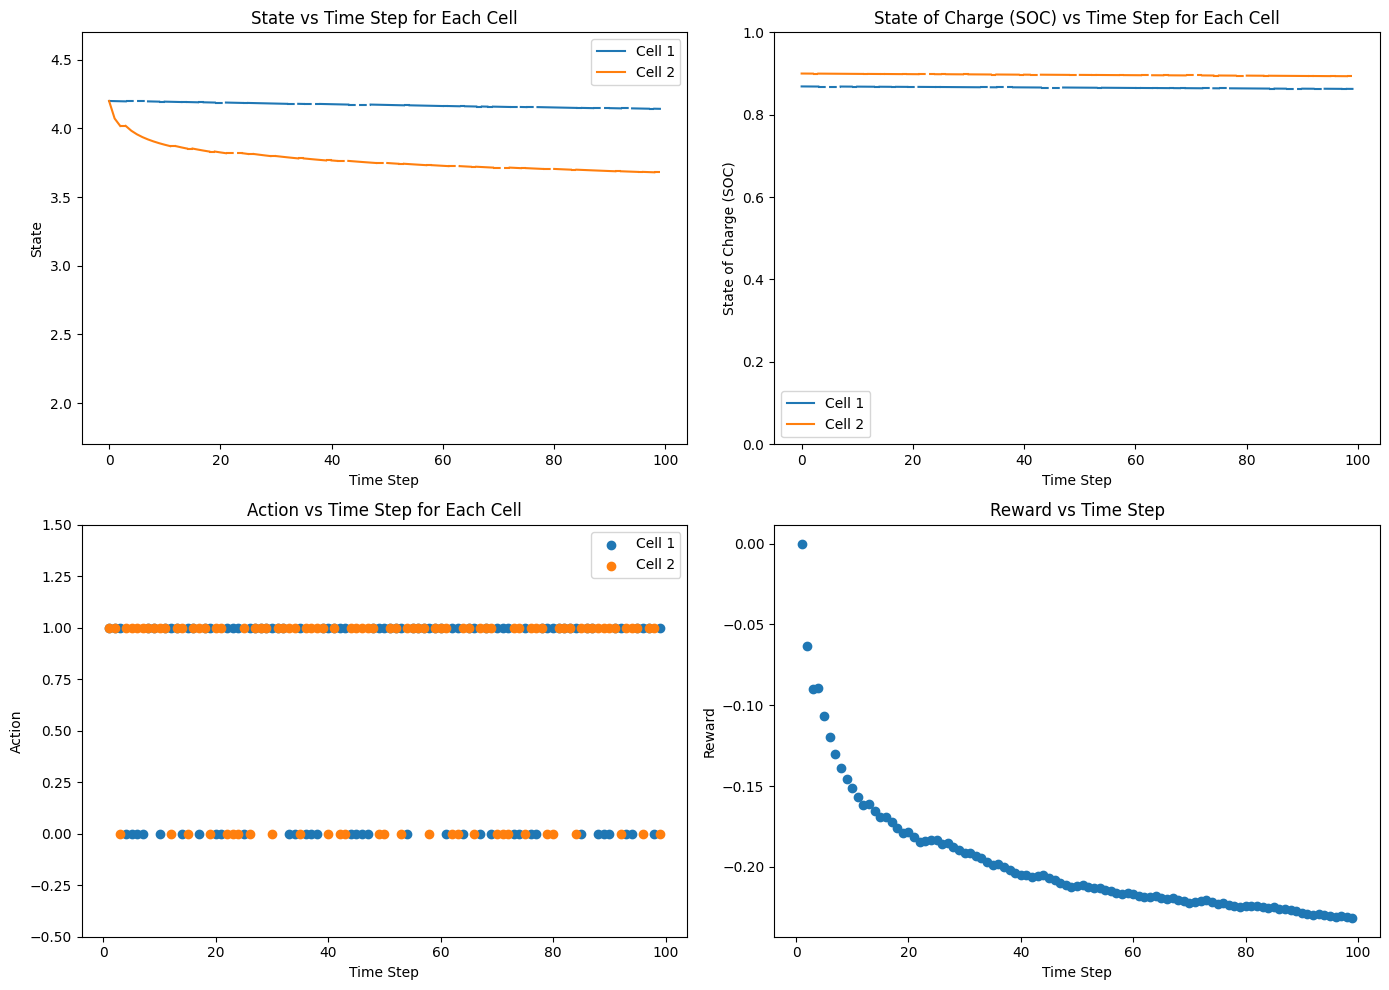

In [23]:
plot_bms_evolution(bms, states, states_soc, actions, rewards, dones)